Checking the different available free tweet data

It's assumed that any finincial data I want will be available

I need to check for the following factors:

test 1:
 - number of tweets
 - quality of tweets
 
test 2:
 - number of high volume unique users
 - quality of high vol users

test 3:
 - responce of tweets to sentiment detection tech
 - responce and listing of tweets to niche sentiment detection tech
 


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#Alt = pd.read_csv("twitter data\Stock Market Tweet  Sentiment Analysis lexicon\tweets_labelled_09042020_16072020.csv")
TCT = pd.read_csv("C:\\Users\\Fabio\\OneDrive\\Documents\\Studies\\Final Project\\Social-Media-and-News-Article-Sentiment-Analysis-for-Stock-Market-Autotrading\\data\\twitter data\\Tweets about the Top Companies from 2015 to 2020\\Company_Tweet.csv\Company_Tweet.csv", index_col="tweet_id")
TT  = pd.read_csv("C:\\Users\\Fabio\\OneDrive\\Documents\\Studies\\Final Project\\Social-Media-and-News-Article-Sentiment-Analysis-for-Stock-Market-Autotrading\\data\\twitter data\\Tweets about the Top Companies from 2015 to 2020\\Tweet.csv\Tweet.csv", index_col="tweet_id")

In [5]:
print("------------------------------------------------------------------------------------------")
print(TCT.info())
print("------------------------------------------------------------------------------------------")
print(TT.info())

------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4336445 entries, 550803612197457920 to 1212160015332728833
Data columns (total 1 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ticker_symbol  object
dtypes: object(1)
memory usage: 66.2+ MB
None
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 3717964 entries, 550441509175443456 to 1212160477159206912
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   writer       object
 1   post_date    int64 
 2   body         object
 3   comment_num  int64 
 4   retweet_num  int64 
 5   like_num     int64 
dtypes: int64(4), object(2)
memory usage: 198.6+ MB
None


In [6]:
print(len(TCT))
print( len(TT))

4336445
3717964


In [7]:
print(TCT.head())
print("------------------------------------------------------------------------------------------")
print(TT.head())

                   ticker_symbol
tweet_id                        
550803612197457920          AAPL
550803610825928706          AAPL
550803225113157632          AAPL
550802957370159104          AAPL
550802855129382912          AAPL
------------------------------------------------------------------------------------------
                             writer   post_date   
tweet_id                                          
550441509175443456  VisualStockRSRC  1420070457  \
550441672312512512      KeralaGuy77  1420070496   
550441732014223360      DozenStocks  1420070510   
550442977802207232     ShowDreamCar  1420070807   
550443807834402816     i_Know_First  1420071005   

                                                                 body   
tweet_id                                                                
550441509175443456  lx21 made $10,008  on $AAPL -Check it out! htt...  \
550441672312512512  Insanity of today weirdo massive selling. $aap...   
550441732014223360  S&P100 #

(array([3.690768e+06, 1.710300e+04, 4.890000e+03, 2.009000e+03,
        9.800000e+02, 1.696000e+03]),
 array([  0.,  50., 100., 150., 200., 250., 500.]),
 <BarContainer object of 6 artists>)

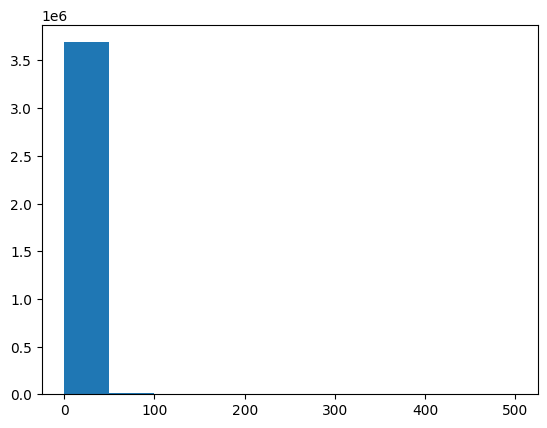

In [8]:
bins = [  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2, 899.1, 999. ]
bins = list(range(0,300,50))
bins = bins + [500]
plt.hist(TT["like_num"], bins=bins)

In [9]:
print("like counts")
TT["like_num"].value_counts(bins=bins)

like counts


like_num
(-0.001, 50.0]    3691472
(50.0, 100.0]       16548
(100.0, 150.0]       4804
(150.0, 200.0]       1975
(250.0, 500.0]       1674
(200.0, 250.0]        973
Name: count, dtype: int64

DONT USE THIS CODE, USE PIVOT TABLES

What are the most common companies?


In [12]:
# Count the frequency of each value in the column
value_counts = TCT["ticker_symbol"].value_counts()

# Get the top 100 repeated values and their frequencies
top_100 = value_counts.head(100)

# Print the top 100 values and their frequencies
for value, frequency in top_100.items():
    print(f'Value: {value}, Frequency: {frequency}')
print("hello")

Value: AAPL, Frequency: 1425013
Value: TSLA, Frequency: 1096868
Value: AMZN, Frequency: 718715
Value: GOOG, Frequency: 392569
Value: MSFT, Frequency: 375711
Value: GOOGL, Frequency: 327569
hello


In [10]:
TT.groupby("writer")["comment_num", "retweet_num", "like_num"].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
TT.groupby("post_date").sum()

C:\Users\Fabio\AppData\Local\Temp\ipykernel_16756\1481524224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TT.groupby("post_date").sum()


,comment_num,retweet_num,like_num
post_date,,,
1420070457,0,0,1
1420070496,0,0,0
1420070510,0,0,0
1420070807,0,0,1
1420071005,0,0,3
...,...,...,...
1577836383,1,0,6
1577836401,0,0,1
1577836443,0,0,5


In [ ]:
import time
from time import strftime, localtime
time.gmtime(1577836553)

time.struct_time(tm_year=2019, tm_mon=12, tm_mday=31, tm_hour=23, tm_min=55, tm_sec=53, tm_wday=1, tm_yday=365, tm_isdst=0)

In [ ]:
time.strftime('%Y-%m-%d %H:%M:%S', localtime(1347517370))

'2012-09-13 08:22:50'

In [ ]:
print(TT["post_date"].min())
print(TT["post_date"].max())

1420070457
1577836553


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentences = TT["body"]
analyzer = SentimentIntensityAnalyzer()
sentiments = []
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    sentiments = sentiments + [vs]
    

KeyboardInterrupt: 

Downloading the Sigma Model

In [34]:
import requests

location = "C:\\Users\\Fabio\\OneDrive\\Documents\\Studies\\Final Project\\Social-Media-and-News-Article-Sentiment-Analysis-for-Stock-Market-Autotrading\\data\\financial data\\tiingo\\"

headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/iex/GOOGL/prices?startDate=2017-01-01&endDate=2021-01-01&resampleFreq=5min&columns=open,high,low,close,volume&token=02dfb3bcafb0c3809fd30f191e071ea2902fc339", headers=headers)
df = pd.DataFrame(requestResponse.json())
#df.to_csv(location + "GOOGL.csv")
#print(requestResponse.json())

In [37]:
requestResponse

<Response [200]>

In [25]:
df

,date,open,high,low,close,volume
0,2019-01-02T14:30:00.000Z,154.740,155.520,154.580,154.760,16102.0
1,2019-01-02T14:35:00.000Z,154.800,155.000,154.310,154.645,19127.0
2,2019-01-02T14:40:00.000Z,154.670,154.940,154.250,154.940,16812.0
3,2019-01-02T14:45:00.000Z,154.990,155.200,154.620,154.795,19006.0
4,2019-01-02T14:50:00.000Z,154.795,155.115,154.690,155.090,12006.0
...,...,...,...,...,...,...
231,2019-01-04T20:35:00.000Z,147.480,147.615,147.155,147.255,13572.0
232,2019-01-04T20:40:00.000Z,147.260,147.930,147.160,147.800,55506.0
233,2019-01-04T20:45:00.000Z,147.800,147.970,147.650,147.730,21836.0
234,2019-01-04T20:50:00.000Z,147.725,147.790,147.670,147.685,3542.0
